In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np

# Setting the parameters

In [2]:
v_in_min = 3.2 #min input voltage (V)
v_in_max = 3.4 #max input voltage (V)
v_out = 12 #nominal output voltage (V)
i_max = 2 #max output current (A)

#sweep parameters
efficiency_min = 0.75
efficinecy_max = 0.99

#arrays
v_in_arr = np.linspace(v_in_min, v_in_max, 1000)

# Calculating max switch current
## Calculating duty cycle

$D = 1 - {{V_{in (min)} * efficiency} \over V_{out}}$

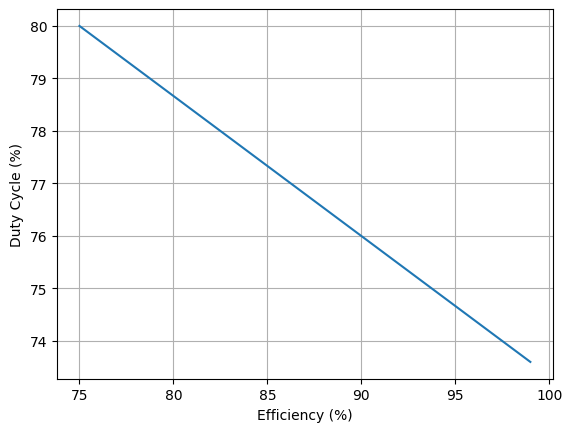

In [3]:
efficiency_arr = np.linspace(efficiency_min, efficinecy_max, 1000) #efficiency
duty_cycle_arr = 1 - ( (v_in_min * efficiency_arr) / (v_out) )
plt.plot(efficiency_arr*1e2, duty_cycle_arr*1e2)
plt.xlabel("Efficiency (%)")
plt.ylabel("Duty Cycle (%)")
plt.grid()

## Calculating inductor ripple current (optional)

$L = {{V_{in} * (V_{out} - V_{in})} \over {\Delta I_L * f_s * V_{out}}}$

### Here
$\Delta I_L$ is inductor ripple current. A good estimation for the inductor ripple current is 20% to 40% of the output current. Or whatever you want

$f_s$ is the switching frequency

In [4]:
# I_l_arr = np.linspace(0.2, 0.4, 1000) * i_max * (v_out / v_in_min) #assumed nominal ripple current array, between 20% to 40% of max current
I_l_arr = np.linspace(0.1, 0.2, 1000)  #assumed nominal ripple current array, between 10mA to 200mA
I_l = 47e-6 #inductor value
f_s = 500e3 #switching frequency
def draw_L_vs_ripple(f):
    l_val_arr = (v_in_arr * (v_out - v_in_arr)) / (I_l_arr * f * v_out)
    plt.plot(I_l_arr, l_val_arr * 1e6)
    plt.xlabel("Ripple Current (A)")
    plt.ylabel("Inductor Val (uH)")
    plt.grid()
interact(draw_L_vs_ripple, f=FloatSlider(value=1e3, min=1e3, max=1e6))

## Get the $f_s$ and $\Delta I_L$ experimentally

$\Delta I_L = {{V_{in(min)} * D} \over {f_s * L}}$

In [ ]:
def wew(f, l):
    print(round((v_in_min * 0.74) / (f*l * 1e-6), 3))
interact(wew, f=FloatSlider(value=1e3, min=1e3, max=1e6), l=FloatSlider(value=1, min=1, max=1e3))

interactive(children=(FloatSlider(value=1000.0, description='f', max=1000000.0, min=1000.0), FloatSlider(value…

<function __main__.wew(f, l)>

## Calculating max switch current ($I_{SW(max)}$)

$I_{SW(max)} = {{\Delta I_L} \over {2}} + {{I_{OUT(max)}} \over {1 - D}}$

In [ ]:
i_sw_max = (10e-3 / 2) + ((1.6) / (1-0.74))
print(f'{round(i_sw_max,3)} A')

6.159 A


## Output capacitor selection

$C_{out(min)} = { {I_{out(max)} * D} \over {f_s * \Delta V_{out}} }$

In [ ]:
c_out_min = (i_max * 0.74) / (f_s * 0.1)
print(c_out_min)

2.96e-05
